## The Data: Pima Indian Classification

### Problem statement 
Using the UCI PIMA Indian Diabetes dataset to predict a person has diabetes or not using the medical attributes provided. (Target is column 8)

### Assumptions

This is enough data to split and reliably predict if the patient has diabetes, the dataset has only 786 data points
Just these attributes are enough to diagnose the ailment
Similar Problems 
This is very much like some common 2 class classification problems like classifying mail into spam and ham based on the contents of the email. Obviously the attributes there would be strings and not numbers like this dataset, therefore the way in which we process at least some of the features will be different.

In [2]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv("data/pima-indians-diabetes.data",header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
X=df[np.arange(8)]
y=df[8]

In [5]:
X.values[0]

array([  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
        50.   ])

In [6]:
X.dtypes

0      int64
1      int64
2      int64
3      int64
4      int64
5    float64
6    float64
7      int64
dtype: object

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.cross_validation import cross_val_score

In [8]:
knn_model = GridSearchCV(KNeighborsClassifier (n_neighbors=1),
                    param_grid={"n_neighbors":range(2,100)},
                   scoring="accuracy",
                   cv=10)

knn_model.fit(X,y)

knn_model.best_score_

0.7552083333333334

In [9]:
knn_model.best_params_

{'n_neighbors': 17}

In [10]:
knn_model.

SyntaxError: invalid syntax (<ipython-input-10-0de5e079c8bd>, line 1)

In [ ]:
svm_linear_model = GridSearchCV(SVC(kernel="linear", C=10, ),
                    param_grid={"C":[1,10,100]},
                   scoring="accuracy",
                   cv=10)

svm_linear_model.fit(X,y)

svm_linear_model.best_score_

In [ ]:
svm_linear_model.best_params_

In [35]:
svm_rbf_model = GridSearchCV(SVC(kernel="rbf", C=10, ),
                    param_grid={"C": range(1,5), "gamma":range(1,5)},
                   scoring="accuracy",
                   cv=10)

svm_rbf_model.fit(X,y)

svm_rbf_model.best_score_

0.6510416666666666

In [36]:
svm_rbf_model.best_params_

{'C': 1, 'gamma': 1}

In [ ]:
svm_poly_model = GridSearchCV(SVC(kernel="poly", C=10, ),
                    param_grid={"C": [1,10,100,1000], "degree":[2,3,4]},
                   scoring="accuracy",
                   cv=10)

svm_poly_model.fit(X,y)

svm_poly_model.best_score_

In [ ]:
tree_model_md = GridSearchCV(DecisionTreeClassifier(max_depth=3),
                    param_grid={"max_depth": [1,10,100,1000]},
                   scoring="accuracy",
                   cv=10)

tree_model_md.fit(X,y)

tree_model_md.best_score_

In [ ]:
tree_model_md.best_params_

In [ ]:
tree_model_md = GridSearchCV(DecisionTreeClassifier(max_depth=3),
                    param_grid={"max_depth": [1,2,3,4,5,6,7,8,9,10]},
                   scoring="accuracy",
                   cv=10)

tree_model_md.fit(X,y)

tree_model_md.best_score_

In [ ]:
tree_model_md.best_params_

In [17]:
tree_model_ms = GridSearchCV(DecisionTreeClassifier(min_samples_leaf=30),
                    param_grid={"min_samples_leaf": [1,10,100,1000]},
                   scoring="accuracy",
                   cv=10)

tree_model_ms.fit(X,y)

tree_model_ms.best_score_

0.734375

In [18]:
tree_model_ms.best_params_

{'min_samples_leaf': 100}

In [19]:
tree_model_ms = GridSearchCV(DecisionTreeClassifier(min_samples_leaf=30),
                    param_grid={"min_samples_leaf": range(5,22)},
                   scoring="accuracy",
                   cv=10)

tree_model_ms.fit(X,y)

tree_model_ms.best_score_

0.75

In [20]:
tree_model_ms.best_params_

{'min_samples_leaf': 14}

In [21]:
lr_model = GridSearchCV(LogisticRegression(),
                        param_grid={},
                   scoring="accuracy",
                   cv=10)

lr_model.fit(X,y)

lr_model.best_score_

0.7669270833333334

In [14]:
lr_model.best_params_

{}

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=43)

In [22]:
lr_model.fit(X_train, y_train)
tree_model_ms.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(2, 100)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [23]:
ensemble_voting = VotingClassifier(estimators=[("log",lr_model), ("kneigh",knn_model), ("dec",tree_model_ms)])

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
from sklearn.ensemble import BaggingClassifier

In [36]:
clfb = BaggingClassifier(base_estimator=LogisticRegression(),
                         n_estimators=100,
                        oob_score=True)

No hace falta separar entre train y test porque el propio Bagging intermente ya no usa todos los datos de train para test de cada modelo

In [37]:
from sklearn.cross_validation import cross_val_score

In [38]:
cross_val_score(clfb, X,y, scoring="accuracy", cv=10).mean()

0.7669685577580314

(array([2., 2., 1., 0., 0., 1., 2., 0., 1., 1.]),
 array([0.72727273, 0.73744019, 0.74760766, 0.75777512, 0.76794258,
        0.77811005, 0.78827751, 0.79844498, 0.80861244, 0.8187799 ,
        0.82894737]),
 <a list of 10 Patch objects>)

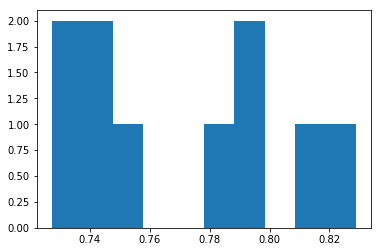

In [32]:
hist(cross_val_score(clfb, X,y, scoring="accuracy", cv=10))

In [51]:
from sklearn.ensemble import RandomForestClassifier
clfr = RandomForestClassifier(min_samples_leaf=30, n_estimators=100, oob_score=True)

In [52]:
cross_val_score(clfr, X,y,scoring="accuracy", cv=10).mean()

0.7591592617908407

In [53]:
clfr.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=30, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [54]:
clfr.estimators_[0]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=30, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=1310673653, splitter='best')

In [55]:
clfr.feature_importances_

array([0.07916837, 0.40402275, 0.0221501 , 0.02989056, 0.05783121,
       0.18533528, 0.07216017, 0.14944157])

In [56]:
sum(clfr.feature_importances_)

0.9999999999999998

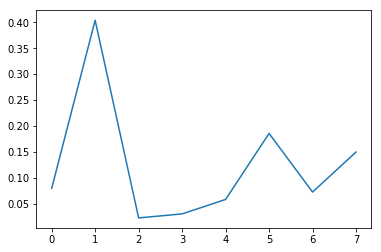

In [57]:
plt.plot(clfr.feature_importances_)

Esto es muy interesante, porque nos dice que variables son las mas importantes para predecir la diabetes

In [58]:
from sklearn.ensemble import AdaBoostClassifier



In [63]:
clfa = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=6), n_estimators=100)

In [64]:
cross_val_score(clfa,X,y, scoring="accuracy", cv=10).mean()

0.7383458646616542

Todo esto se puede pasar por un grid, pero habría que ejecutarlo varias veces debido al caracter aleatorio que tiene RandomForest

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

clfgb = GradientBoostingClassifier(n_estimators=100)

In [67]:
cross_val_score(clfb,X,y,scoring="accuracy",cv=10).mean()

0.7656698564593301

XGBoost calcula la funcion de coste con un método mucho mas rápido que GradientBoosting

In [74]:
!conda install -yc conda-forge xgboost

Solving environment: / 
  - anaconda::ca-certificates-2018.03.07-0, anaconda::openssl-1.0.2o-h26aff7b_0
  - anaconda::openssl-1.0.2o-h26aff7b_0, defaults::ca-certificates-2018.03.07-0
  - anaconda::ca-certificates-2018.03.07-0, defaults::openssl-1.0.2o-h26aff7b_0
  - defaults::ca-certificates-2018.03.07-0, defaults::openssl-1.0.2o-h26aff7bdone

## Package Plan ##

  environment location: /anaconda3

  added / updated specs: 
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2018.4.16          |           py36_0         142 KB  conda-forge
    llvm-meta-6.0.1            |                0           2 KB  conda-forge
    openmp-6.0.1               |       h2d50403_0         221 KB  conda-forge
    xgboost-0.80               |   py36hfc679d8_0         1.2 MB  conda-forge
    conda-4.5.11               |           py36_0         625 KB  conda-forge
    -----------------

In [14]:
from xgboost import XGBClassifier
import os

In [15]:
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [11]:
clfxb = XGBClassifier(n_estimators=100)

In [12]:
cross_val_score(clfxb, X, y, scoring="accuracy", cv=10).mean()

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

0.7694805194805194

In [ ]:
clfxb.